# The Towers of Hanoi


The goal is to move all of the discs from tower A to tower C given the following constraints:

- Only one disc can be moved at a time.
- The topmost disc of any tower is the only one available for moving.
- A wider disc can never be atop a narrower disc.

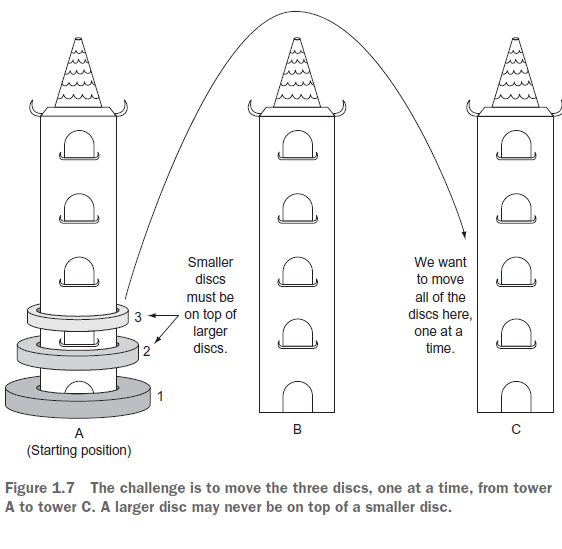

### Modeling the towers.

A stack is a data structure that is modeled on the concept of Last-In-First-Out (LIFO). 

In [5]:
from typing import TypeVar, Generic, List   # Generic enables Stack to be generic over a particular type in type hints

T = TypeVar('T')  # This variable can be of any type

class Stack(Generic[T]):
    def __init__(self) -> None:
        self._container: List[T] = []
    
    def push(self, item: T) -> None:
        self._container.append(item)
    
    def pop(self) -> T:
        return self._container.pop()
    
    def __repr__(self) -> str:      # __repr__() is what will be output when print is applied to Stack
        return repr(self._container)

Stacks are perfect stand-ins for the towers in The Towers of Hanoi. When we want to put a disc onto a tower, we can just push it. When we want to move a disc from one tower to another, we can pop it from the first and push it onto the second. 

Let's define our towers as Stacks and fill the first tower with discs.

In [6]:
num_discs: int = 3
tower_a: Stack[int] = Stack()
tower_b: Stack[int] = Stack()
tower_c: Stack[int] = Stack()

for i in range(1, num_discs + 1):
    tower_a.push(i)

### Solving the towers of Hanoi

This problem can be solved in a recursive fashion. The base case is moving a single disc, the recursive case is moving more than one discs. The recursive step could be break into three steps:

1. Move the upper n-1 discs from tower A to B (the temporary tower), using C as the in-betweem.

2. Move the singlest lowest disc from A to C.

3. Move the n-1 discs from tower B to C, using A as the in-between.


This recursive algorithm works not only for three discs, but for any number of discs. 

The function `hanoi` is responsible for moving the discs from one tower to another, given a third temporary tower.

In [7]:
def hanoi(begin: Stack[int], end: Stack[int], temp: Stack[int], n: int) -> None:
    if n == 1:
        end.push(begin.pop())
    else:
        hanoi(begin, temp, end, n - 1)
        hanoi(begin, end, temp, 1)
        hanoi(temp, end, begin, n - 1)
        
print(tower_a, tower_b, tower_c)
hanoi(tower_a, tower_c, tower_b, num_discs)
print(tower_a, tower_b, tower_c)

[1, 2, 3] [] []
[] [] [1, 2, 3]


While we do not know exactly how the problem is solved, we clearly understand the loving behind the recursive algorihtm. This is the power of formulating recursive algorithms to problems: *we often can think of solutions in abstract manner without the drudgery of negotiating every individual action in our minds.*

Unfortunately, this function has exponential complexity. 